In [2]:
import numpy as np
from keras.datasets import cifar10
from Model import Model
import pickle

import matplotlib.pyplot as plt

In [3]:
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

In [4]:
#Checking distribution of targets in training data
np.unique(train_Y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

#### Selecting subset of 3 classes

In [5]:
def filterData(x, y, classes):
    x_filt = []
    y_filt = []
    for i in range(0, len(y)):
        if y[i] in classes:
            y_filt.append(y[i])
            x_filt.append(x[i])
    return np.array(x_filt), np.array(y_filt)

In [6]:
classes = [0, 1, 2]
train_X, train_Y = filterData(train_X, train_Y, classes)
test_X, test_Y = filterData(test_X, test_Y, classes)
testImages = test_X

#### Normalize the features

In [7]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

#### Splitting training set into training and validation sets

In [8]:
val_X = train_X[:4500]
train_X = train_X[4500:]
val_Y = train_Y[:4500]
train_Y = train_Y[4500:]

In [9]:
train_X.shape

(10500, 32, 32, 3)

In [10]:
train_Y.shape

(10500, 1)

In [11]:
val_X.shape

(4500, 32, 32, 3)

In [13]:
val_Y.shape

(4500, 1)

#### Vectorizing images

In [14]:
def vectorizeImages(imageData):
    return imageData.reshape(imageData.shape[0], np.prod(imageData.shape[1:]))

In [15]:
train_X = vectorizeImages(train_X)
train_X.shape

(10500, 3072)

In [16]:
val_X = vectorizeImages(val_X)
val_X.shape

(4500, 3072)

In [17]:
test_X = vectorizeImages(test_X)
test_X.shape

(3000, 3072)

#### Encoding target values

In [19]:
def getOneHotEncoding(y):
    res=[]
    uniqY = np.unique(y)
    for i in y:
        v = np.zeros(len(uniqY))
        ind = np.where(uniqY == i)[0][0]
        v[ind] = 1
        res.append(v)
    return np.array(res)

In [20]:
train_Y = getOneHotEncoding(train_Y)
train_Y.shape

(10500, 3)

In [21]:
val_Y = getOneHotEncoding(val_Y)
val_Y.shape

(4500, 3)

In [22]:
testlabels = test_Y
test_Y = getOneHotEncoding(test_Y)
test_Y.shape

(3000, 3)

#### Run this to load model from json file

In [95]:
with open("task2CIFARmodel.txt", "rb") as fp:   # Unpickling
    model = pickle.load(fp)
print("Loaded model from disk")

Loaded model from disk


#### Build Neural Network

In [83]:
model = Model()
model.build(train_X.shape[1],train_Y.shape[1],[64,16])

In [84]:
lr = 0.001
epochs = 25
decay = lr/epochs
training=model.fit(train_X,train_Y,val_X,val_Y,lr,epochs, decay)

Epoch: 0
{'Training_Loss': 1.1903697535815, 'Training_Accuracy': 36.22, 'Validation_Loss': 1.1950843334118344, 'Validation_Accuracy': 36.31}
Epoch: 1
{'Training_Loss': 1.1759626111230317, 'Training_Accuracy': 37.41, 'Validation_Loss': 1.1771155442235088, 'Validation_Accuracy': 37.6}
Epoch: 2
{'Training_Loss': 1.1646110979124604, 'Training_Accuracy': 37.62, 'Validation_Loss': 1.165843092951468, 'Validation_Accuracy': 38.0}
Epoch: 3
{'Training_Loss': 1.1572804475605134, 'Training_Accuracy': 38.29, 'Validation_Loss': 1.158092368151141, 'Validation_Accuracy': 38.82}
Epoch: 4
{'Training_Loss': 1.1527312434634276, 'Training_Accuracy': 38.72, 'Validation_Loss': 1.153084459142677, 'Validation_Accuracy': 39.24}
Epoch: 5
{'Training_Loss': 1.1498937601283148, 'Training_Accuracy': 38.93, 'Validation_Loss': 1.149950532239502, 'Validation_Accuracy': 39.33}
Epoch: 6
{'Training_Loss': 1.148095309644141, 'Training_Accuracy': 38.91, 'Validation_Loss': 1.1479744469044226, 'Validation_Accuracy': 39.11}
Ep

#### Save model to disk

In [96]:
with open("task2CIFARmodel.txt", "wb") as fp:   #Pickling
    pickle.dump(model, fp)
print("Saved model to disk")

Saved model to disk


#### Plotting the training and Validation loss as function of epochs

In [86]:
val_loss = training['Validation_Loss']
val_accuracy = training['Validation_Accuracy']
loss = training['Training_Loss']
accuracy = training['Training_Accuracy']
epochs = range(1, 25+1)

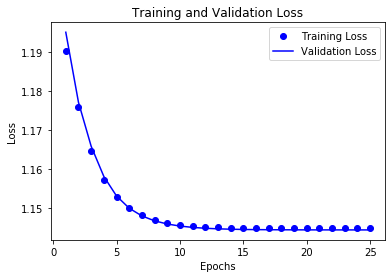

In [87]:
plt.plot(epochs, loss[:25], 'bo', label='Training Loss')
plt.plot(epochs, val_loss[:25], 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Plotting the training and Validation accuracy as function of epochs

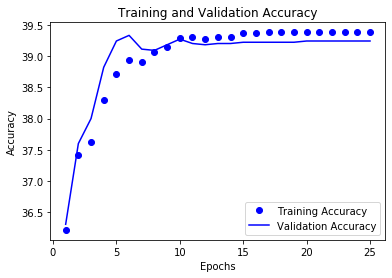

In [88]:
plt.plot(epochs, accuracy[:25], 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy[:25], 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [89]:
results = model.evaluateModel(test_X, test_Y)
print(results)

(1.1343030465977209, 39.73)
